In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

In [3]:
## para deixar as imagens maiores
#plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
v = np.ones((30,50)) * 0.5

In [5]:
v[0,:]=1
v[-1,:]=1
v[:,0]=1
v[:,-1]=1

In [6]:
v[10:15,20:25] = 1

In [7]:
v[20:25,40:45] = 0

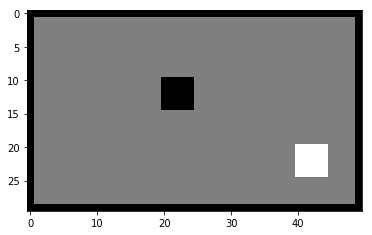

In [8]:
img = Image.fromarray(np.uint8((1-v) * 255) , 'L')
imshow(img)

In [20]:
h,w = v.shape
oldv = v.copy()
newv = v.copy()
for t in range(1000):
    updated=False
    for x in range(h):
        for y in range(w):
            if v[x,y] not in (0.,1.):
                if oldv[x,y] <= min(oldv[x-1,y],oldv[x+1,y],oldv[x,y-1],oldv[x,y+1]):
                    updated = True
                newv[x,y] = (oldv[x-1,y]+oldv[x+1,y]+oldv[x,y-1]+oldv[x,y+1])/4
    oldv=newv.copy()
    if not updated:
        break
print(t)

386


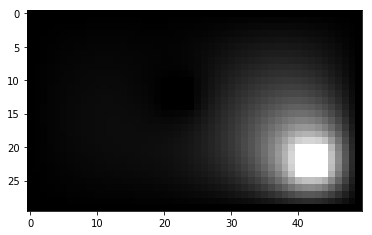

In [21]:
img = Image.fromarray(np.uint8((1-oldv) * 255) , 'L')
imshow(img)

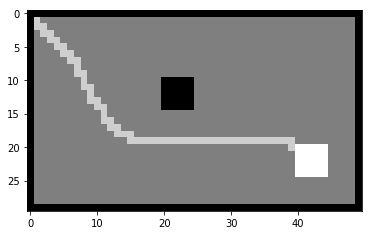

In [22]:
path = np.zeros(v.shape)
x,y = 1, 1
while v[x,y] != 0:
    path[x,y] = 1
    x,y = min((x-1,y), (x+1,y), (x,y-1), (x,y+1), key=lambda a:newv[a[0],a[1]])
img = Image.fromarray(np.uint8((1-(path*0.7 + v)) * 255) , 'L')
imshow(img)    

In [23]:
cost = np.ones((h,w))*1000
cost

pos = (10,10)
goal = (20,40)
for t in range(100):
    x,y = pos
    if cost[x,y] == 0:
        break
    for x,y in [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]:
        if v[x,y] in [0,1]:
            cost[x,y] = v[x,y]
        if cost[x,y] == 1000:
            cost[x,y] = abs(goal[0]-x) + abs(goal[1]-y) # manhattan
    x,y = pos
    x,y = min((x-1,y), (x+1,y), (x,y-1), (x,y+1), key=lambda a:cost[a[0], a[1]])
    pos = (x,y)
    print(x,y , cost[x,y])

11 10 39.0
12 10 38.0
13 10 37.0
14 10 36.0
15 10 35.0
16 10 34.0
17 10 33.0
18 10 32.0
19 10 31.0
20 10 30.0
20 11 29.0
20 12 28.0
20 13 27.0
20 14 26.0
20 15 25.0
20 16 24.0
20 17 23.0
20 18 22.0
20 19 21.0
20 20 20.0
20 21 19.0
20 22 18.0
20 23 17.0
20 24 16.0
20 25 15.0
20 26 14.0
20 27 13.0
20 28 12.0
20 29 11.0
20 30 10.0
20 31 9.0
20 32 8.0
20 33 7.0
20 34 6.0
20 35 5.0
20 36 4.0
20 37 3.0
20 38 2.0
20 39 1.0
20 40 0.0


In [165]:
def mkPathPlanA(worldmap, start, goal=(0,0), maxruns=200):
    wx,wy = worldmap.shape
    gx,gy = goal
    gridx, gridy = np.mgrid[-gx:wx-gx,-gy:wy-gy]
    grid = np.abs(gridx) + np.abs(gridy) + worldmap
    last = start
    choice = set()
    while(maxruns>0 and grid[last[0], last[1]]>0):
        maxruns -= 1
        temp = grid.copy()
        temp[last[0], last[1]] = -1
        choice.add(tuple(last))
        candidates = [
                [last[0]-1,last[1]],
                [last[0]  ,last[1]-1],
                [last[0]+1,last[1]],
                [last[0]  ,last[1]+1],
                ]
        candidates = [(x,y) for (x,y) in candidates if x>=0 and y>=0 and not np.isnan(grid[x,y])]
        prox = min(candidates, key=lambda a:grid[a[0], a[1]])
        if grid[prox[0], prox[1]]>grid[last[0],last[1]]: # at local minimum
            grid[last[0],last[1]]=grid[prox[0], prox[1]] +1 # flat here
            last = prox
            if tuple(prox) in choice:
                choice.remove(last)
            continue
        if grid[prox[0], prox[1]]==grid[last[0],last[1]]:
            grid[prox[0], prox[1]]+=1
            continue
        if tuple(prox) in choice:
            choice.remove(last)
        last=prox
    choice.add(last)
    return grid, choice

In [175]:
mymap=np.zeros((6,6))
mymap[0:4,2]=np.nan
mymap

array([[ 0.,  0., nan,  0.,  0.,  0.],
       [ 0.,  0., nan,  0.,  0.,  0.],
       [ 0.,  0., nan,  0.,  0.,  0.],
       [ 0.,  0., nan,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [176]:
x = mkPathPlanA(mymap,(1,1),goal=(2,3))
x

(array([[ 9.,  8., nan,  2.,  3.,  4.],
        [ 8.,  7., nan,  1.,  2.,  3.],
        [ 7.,  6., nan,  0.,  1.,  2.],
        [ 6.,  5., nan,  1.,  2.,  3.],
        [ 5.,  4.,  3.,  2.,  3.,  4.],
        [ 6.,  5.,  4.,  3.,  4.,  5.]]),
 {(0, 0),
  (0, 1),
  (1, 1),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 3),
  (4, 0),
  (4, 1),
  (4, 2),
  (4, 3)})

In [173]:
y = x[0].copy()
for z in x[1]:
   y[z[0],z[1]] = np.nan
y

array([[      nan,       nan, 1.003e+03, 2.000e+00, 3.000e+00, 4.000e+00],
       [8.000e+00,       nan, 1.002e+03, 1.000e+00, 2.000e+00, 3.000e+00],
       [7.000e+00,       nan, 1.001e+03,       nan, 1.000e+00, 2.000e+00],
       [      nan,       nan, 1.002e+03,       nan, 2.000e+00, 3.000e+00],
       [      nan,       nan,       nan,       nan, 3.000e+00, 4.000e+00],
       [6.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 5.000e+00]])

In [81]:
y = x - np.nanmin(x)

In [82]:
y = y/np.nanmax(y)

In [83]:
y

array([[1.   , 1.   ,   nan, 0.25 , 0.375, 0.5  ],
       [1.   , 0.875,   nan, 0.125, 0.25 , 0.375],
       [0.875, 0.75 ,   nan, 0.   , 0.125, 0.25 ],
       [0.75 , 0.625,   nan, 0.125, 0.25 , 0.375],
       [0.625, 0.5  , 0.375, 0.25 , 0.375, 0.5  ],
       [0.75 , 0.625, 0.5  , 0.375, 0.5  , 0.625]])

In [84]:
tuple([2,3])

(2, 3)

In [85]:
s = set()

In [86]:
s.add((2,3))

In [87]:
(2,3) in s

True

In [88]:
s.remove((2,3))

In [199]:
x,y =np.gradient([[2,2],[4,4]])
np.mean(x), np.mean(y)

(2.0, 0.0)

In [200]:
np.arctan2(2,0)*180/np.pi

90.0

In [345]:
x,y =np.gradient([[1,2],[2,3]])
np.mean(x), np.mean(y)

(1.0, 1.0)

In [346]:
np.arctan2(1,-1)*180/np.pi

135.0

In [204]:
import collections
import numpy as np

In [336]:
def a_star(start, goal, h, neighbors):
    todo = set()
    todo.add(start)
    done = set()
    came = {}
    g = collections.defaultdict(lambda:np.inf)
    g[start] = 0
    f = collections.defaultdict(lambda:np.inf)
    f[start] = h(start, goal)
    while(len(todo)>0):
        cur = min(todo, key=lambda x: f[x])
        if cur == goal:
            p = [cur]
            while cur in came:
                cur = came[cur]
                p.append(cur)
            return p[::-1]
        todo.remove(cur)
        done.add(cur)
        for neighbor in neighbors(cur):
            if neighbor in done:
                continue
            if not neighbor in todo:
                todo.add(neighbor)
            tempg = g[cur] + h(cur, neighbor)
            if tempg >= g[neighbor]:
                continue
            g[neighbor] = tempg
            came[neighbor] = cur
            f[neighbor] = g[neighbor] + h(neighbor,goal)

In [337]:
mymap=np.zeros((6,6))
mymap[0:4,2]=np.nan
mymap

array([[ 0.,  0., nan,  0.,  0.,  0.],
       [ 0.,  0., nan,  0.,  0.,  0.],
       [ 0.,  0., nan,  0.,  0.,  0.],
       [ 0.,  0., nan,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [338]:
def genh(blocks):
    def h(start, goal):
        if np.isnan(blocks[goal[0],goal[1]]):
            return np.inf
        return np.sqrt(np.sum((np.array(start)-np.array(goal))**2))
    return h
def neighbors(pos):
    r = set()
    for x in range(-1,2):
        for y in range(-1,2):
            r.add((pos[0]+x,pos[1]+y))
    return [(x,y) for (x,y) in r if (x,y)!=pos and x>=0 and y>=0]

In [339]:
h1 = genh(mymap)
h1((1,0),(1,1))

1.0

In [340]:
a_star((1,1), (3,3), genh(mymap), neighbors)

[(1, 1), (2, 1), (3, 1), (4, 2), (3, 3)]

In [242]:
neighbors((1,1))

[(0, 1), (1, 2), (0, 0), (2, 1), (2, 0), (2, 2), (1, 0), (0, 2)]

In [230]:
a.t(np.array([[1,2],[10,30]]).T)

AttributeError: 'numpy.ndarray' object has no attribute 'cross'

In [282]:
a = set()

In [283]:
a.add((2,3))

In [284]:
a

{(2, 3)}

In [285]:
a.add((2,1))

In [286]:
a

{(2, 1), (2, 3)}

In [307]:
f = collections.defaultdict(lambda:np.inf)

In [308]:
f.keys()

dict_keys([])

In [311]:
cur = min(f.keys(), key=lambda x: f[x])

In [310]:
f[(1,1)]=3

In [344]:
np.positive(-1)

-1

In [350]:
rot = np.arctan2(10,10)
rot = (rot+np.pi)%(2*np.pi)-np.pi
rot

0.7853981633974483

In [352]:
np.arctan2(10,10)*180/np.pi

45.0

In [355]:
a = [1,2,3]

In [357]:
0.1*180/np.pi

5.729577951308232

In [2]:
import time

In [7]:
import datetime

In [14]:
datetime.datetime.now().strftime("worldmap-%Y%m%d-%H%M.png")

'worldmap-20181111-1816.png'

In [15]:
!ls

1.sh		  LaserScanDev.ipynb  mapa.ipynb   reem
2.sh		  LaserScan.ipynb     move.py	   savemap.sh
3.sh		  laserscan.txt       my_map.pgm   Screenshot.png
amcl_with_map.sh  map2.pgm	      my_map.yaml  worldmap-20181111-2017.png
key.sh		  map2.yaml	      ranges.txt   worldmap-20181111-2022.npy


In [2]:
w = np.load('worldmap-20181111-2022.npy')

In [3]:
import cv2

ModuleNotFoundError: No module named 'cv2'